In [52]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


In [53]:
df = pd.read_csv("../tim_gabbard_all/all_gp.csv")

In [12]:

df = df.sort_values('PERIAPSIS')
len(df[df['PERIAPSIS'] < 0

38

In [15]:
df['APOAPSIS'].describe()

count    4.499200e+04
mean     4.654823e+03
std      1.749523e+04
min     -1.418370e+02
25%      2.691677e+02
50%      5.511980e+02
75%      1.043538e+03
max      1.101767e+06
Name: APOAPSIS, dtype: float64

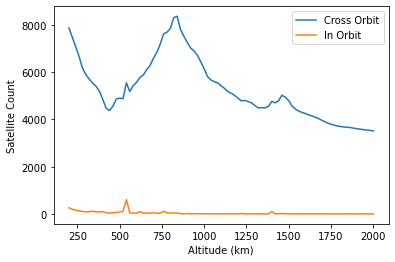

In [61]:
cross_counts = {}
tol_counts = {}
bin_size = 20
tolerance = 0

for alt in np.arange(200,2000+bin_size,bin_size):
    cross_count = len(df[(df['PERIAPSIS'] <= alt+bin_size) & (df['APOAPSIS'] >= alt) & (df['PERIAPSIS'] > 0)])
    cross_counts[alt] = cross_count
    tol_count = len(df[(df['PERIAPSIS']>=alt-tolerance) & (df['APOAPSIS']<=alt+bin_size+tolerance)])
    tol_counts[alt] = tol_count
    

plt.figure()
x = cross_counts.keys()
y1 = cross_counts.values()
y2 = tol_counts.values()
plt.plot(x,y1, label='Cross Orbit')
plt.plot(x,y2, label='In Orbit')
plt.xlabel("Altitude (km)")
plt.ylabel("Satellite Count")
plt.legend()
plt.show()

$Sphere Area = 4*\pi*r^2$

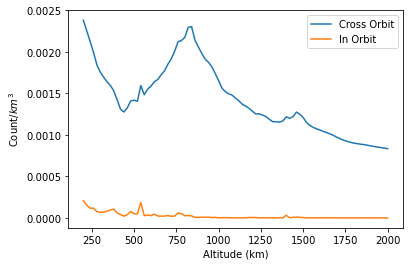

In [63]:
cross_density = {}
tol_density = {}
earth_radius = 6371
bin_size = 20
tolerance = 5


for alt in np.arange(200,2000+bin_size,bin_size):
    spatial_vol = 4*np.pi*(earth_radius+alt+bin_size)**2 - \
                  4*np.pi*(earth_radius+alt)**2
    cross_count = len(df[(df['PERIAPSIS'] <= alt+bin_size) & (df['APOAPSIS'] >= alt) & (df['PERIAPSIS'] > 0)])
    cross_density[alt] = cross_count / spatial_vol
    tol_count = len(df[(df['PERIAPSIS']>=alt-tolerance) & (df['APOAPSIS']<=alt+bin_size+tolerance)])
    tol_density[alt] = tol_count / spatial_vol

plt.figure()
x = cross_density.keys()
y1 = cross_density.values()
y2 = tol_density.values()
plt.plot(x,y1, label='Cross Orbit')
plt.plot(x,y2, label='In Orbit')
plt.xlabel("Altitude (km)")
plt.ylabel("Count/$km^3$")
plt.legend()
plt.show()